<a href="https://colab.research.google.com/github/rroyc20/Ybigta-21-/blob/main/ML_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ybigta 방학세션/ML/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ybigta 방학세션/ML/movies_test.csv')

In [12]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [13]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [14]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [15]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000
mean,109.798354,8.916695e+05,0.851852,159.316872,3.477366
std,124.022711,1.217341e+06,1.200321,162.976607,2.111192
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000
75%,114.500000,1.080850e+06,1.000000,282.000000,4.000000
max,2015.000000,6.173100e+06,6.000000,776.000000,16.000000


# 데이터 전처리

In [16]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [17]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [18]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [19]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [20]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [21]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [23]:
train.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [28]:
train.columns

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', '년',
       '월', 'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스',
       'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트', 'distributor_기타',
       'distributor_롯데엔터테인먼트', 'genre_SF', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가'],
      dtype='object')

# 모델 생성 및 예측(과제부분)

In [22]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [34]:
train_features = train_x
train_target = train_y

In [39]:
from sklearn.model_selection import GridSearchCV
param_range1 = [5, 10, 15, 20, 25]
param_range2 = [10, 20, 30]

param_grid = [{'max_features': param_range1,
              'max_depth': param_range2}]
               
forest = RandomForestRegressor()
gs = GridSearchCV(estimator = forest,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=5,
                 n_jobs= -1)

gs = gs.fit(train_x, train_y)

print(-gs.best_score_)
print(gs.best_params_)

2022548229839.043
{'max_depth': 20, 'max_features': 5}


In [40]:
# 5보다 작은 max features값과 20과 보다 가까운 max_depth로 확인
param_range1 = [1, 2,3,4,5]
param_range2 = [15, 20, 25]

param_grid = [{'max_features': param_range1,
              'max_depth': param_range2}]

forest = RandomForestRegressor()
gs = GridSearchCV(estimator = forest,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=5,
                 n_jobs= -1)

gs = gs.fit(train_x, train_y)

print(-gs.best_score_)
print(gs.best_params_)

2080893719893.018
{'max_depth': 15, 'max_features': 5}


In [51]:
model=RandomForestRegressor(max_depth = 15, max_features = 5)
model.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, max_features=5)

In [52]:
pred = model.predict(test)

# 제출

In [53]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ybigta 방학세션/ML/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [56]:
submission['box_off_num'] = pred

In [57]:
submission

,title,box_off_num
0,용서는 없다,2.072435e+06
1,아빠가 여자를 좋아해,1.804485e+06
2,하모니,1.659706e+06
3,의형제,2.515375e+06
4,평행 이론,1.344209e+06
...,...,...
238,해에게서 소년에게,1.674856e+05
239,울보 권투부,1.658205e+05
240,어떤살인,3.044204e+05
241,말하지 못한 비밀,2.068864e+04


In [58]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

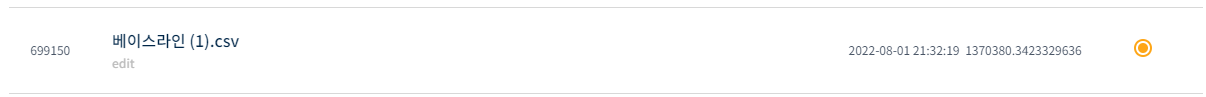